STT: 20

Họ và tên: Phạm Đức Thể

MSSV: 19522253

Lớp: DS105.M11.2

Buổi 05 - 22/11/2021



# [LAB 06: Data Visualization](https://drive.google.com/file/d/1GimdHWI1EV4xFZZAutCKpWOc1L7542cQ/preview)

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import tensorflow as tf
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import re
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import clear_output 

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows
sns.set()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [ ]:
url_data = '/content/drive/MyDrive/Dataset/Canada.xlsx'

## **Câu 1**. Tạo dataframe (df) lưu trữ dataset tại đường dẫn trên. Xuất 5 samples đầu tiên. Dataset có bao nhiêu sample, số lượng bao nhiêu feature.

In [ ]:
df = pd.read_excel(url_data, sheet_name='Canada by Citizenship (2)')
# Xuất 5 samples đầu tiên
df.head(5)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [ ]:
print('Dataset có {} sample và {} feature'.format(df.shape[0], df.shape[1]))

Dataset có 196 sample và 43 feature


**Nhận xét**: Dataset có 196 sample và 43 feature

## **Câu 2**. Đổi tên các column thành tên mới như sau: `columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}`. Sau đó loại bỏ các `column = ['AREA','REG','DEV','Type','Coverage']` ra khỏi dataset.


In [ ]:
rename_columns = {'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}
del_columns = ['AREA','REG','DEV','Type','Coverage']
# Rename columns
df_new = df.rename(rename_columns, axis='columns')
# Drop columns
df_new = df_new.drop(del_columns, axis='columns')

In [ ]:
df_new.head(5)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


## **Câu 3**. Tạo thêm cột `'Total'` trong dataset, lưu trữ tổng số người từ năm 1980 đến 2013 của từng quốc gia. 

In [ ]:
df_new['Total'] = df_new.sum(axis=1)

In [ ]:
df_new.head(5)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


## **Câu 4**. Chuyển đổi các giá trị trong cột Country thành index của dòng.


In [ ]:
df_new.set_index('Country', inplace=True)
df_new.head(5)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


## **Câu 5**. Gọi biến years lưu trữ thông tin các cột của các năm từ 1980 đến năm 2013 (`years = [1980, 1981, ..., 2013]`). Thiết kế các cách truy vấn trả về một dataframe với input là một country bất kỳ.


In [ ]:
years = df_new.columns[3:-1]
def df_country(country, year = years):
  DF = df_new[df_new.index == country].loc[:, year].T.squeeze()
  return DF

In [ ]:
df_country(country = 'Japan', year = years)

1980    701 
1981    756 
1982    598 
1983    309 
1984    246 
1985    198 
1986    248 
1987    422 
1988    324 
1989    494 
1990    379 
1991    506 
1992    605 
1993    907 
1994    956 
1995    826 
1996    994 
1997    924 
1998    897 
1999    1083
2000    1010
2001    1092
2002    806 
2003    817 
2004    973 
2005    1067
2006    1212
2007    1250
2008    1284
2009    1194
2010    1168
2011    1265
2012    1214
2013    982 
Name: Japan, dtype: int64

In [ ]:
df_country(country = 'Haiti', year = years)

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
1985    1321
1986    1753
1987    2132
1988    1829
1989    2377
1990    2379
1991    2829
1992    2399
1993    3655
1994    2100
1995    2014
1996    1955
1997    1645
1998    1295
1999    1439
2000    1631
2001    2433
2002    2174
2003    1930
2004    1652
2005    1682
2006    1619
2007    1598
2008    2491
2009    2080
2010    4744
2011    6503
2012    5868
2013    4152
Name: Haiti, dtype: int64

## **Câu 6**. Tạo plot thể hiện số lượng di cư (sự biến động, diễn biến) của Haiti và Japan đến Canada từ năm 1980 đến 2013.

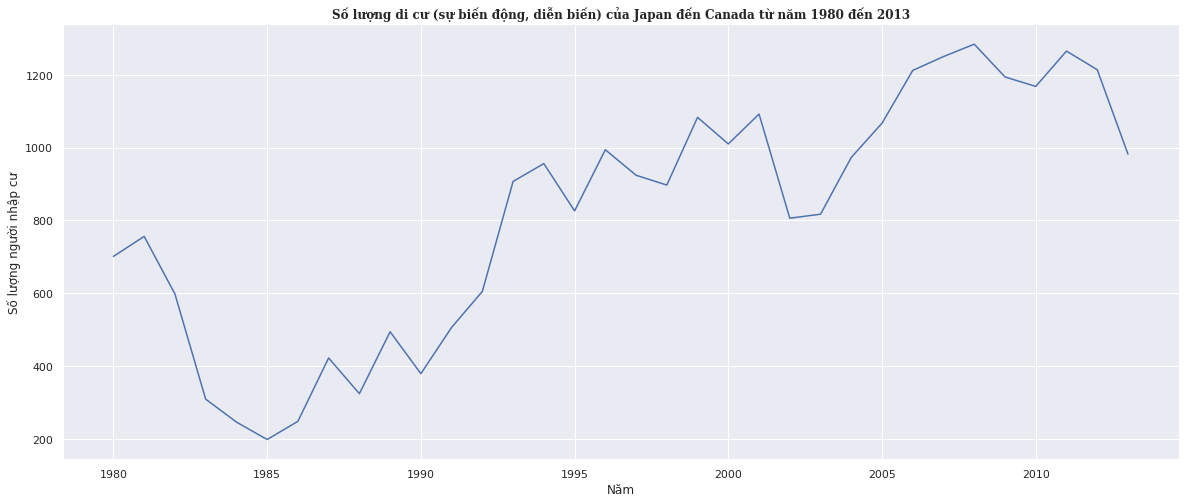

In [ ]:
japan_canada = df_country(country = 'Japan', year = years)
plt.figure(figsize=(20,8))
japan_canada.plot.line()
plt.xlabel('Năm')
plt.ylabel('Số lượng người nhập cư')
plt.title('Số lượng di cư (sự biến động, diễn biến) của Japan đến Canada từ năm 1980 đến 2013', fontweight='bold', fontfamily='serif')
clear_output()
plt.show()

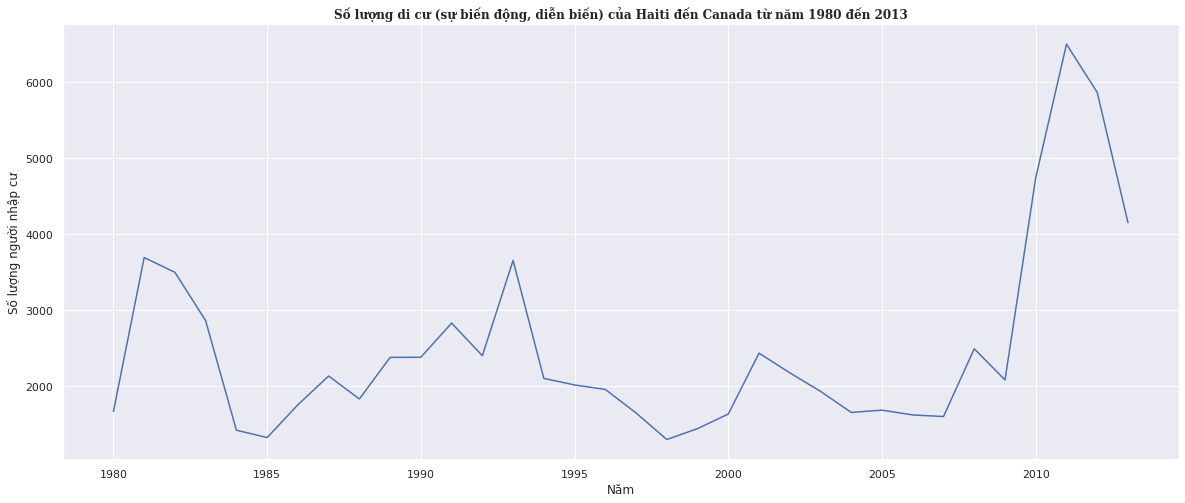

In [ ]:
haiti_canada = df_country(country = 'Haiti', year = years)
plt.figure(figsize=(20,8))
haiti_canada.plot.line()
plt.xlabel('Năm')
plt.ylabel('Số lượng người nhập cư')
plt.title('Số lượng di cư (sự biến động, diễn biến) của Haiti đến Canada từ năm 1980 đến 2013', fontweight='bold', fontfamily='serif')
clear_output()
plt.show()

## **Câu 7**. Tạo plot mô tả xu hướng nhập cư của năm quốc gia có tỷ lệ nhập cư cao nhất vào Canada từ năm 1980 đến 2013.


Tỉ lệ nhập cư = Total của từng quốc gia / tổng của cột Total

$=>$ 5 quốc gia có tỉ lệ nhập cư cao nhất vào Canada có nghĩa là 5 quốc gia có tổng số người nhập cư vào Canada cao nhất.

In [ ]:
top5_max = df_new.sort_values(by=['Total'], ascending=False).head(5)
top5_max

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Unknown,World,World,World,44000,18078,16904,13635,14855,14368,13303,17304,22279,27118,28397,25293,33100,34589,30717,25152,25986,23151,13468,10132,10743,7993,5938,4052,3739,4785,4583,4348,4197,3402,3731,2554,1681,1484,515059
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391


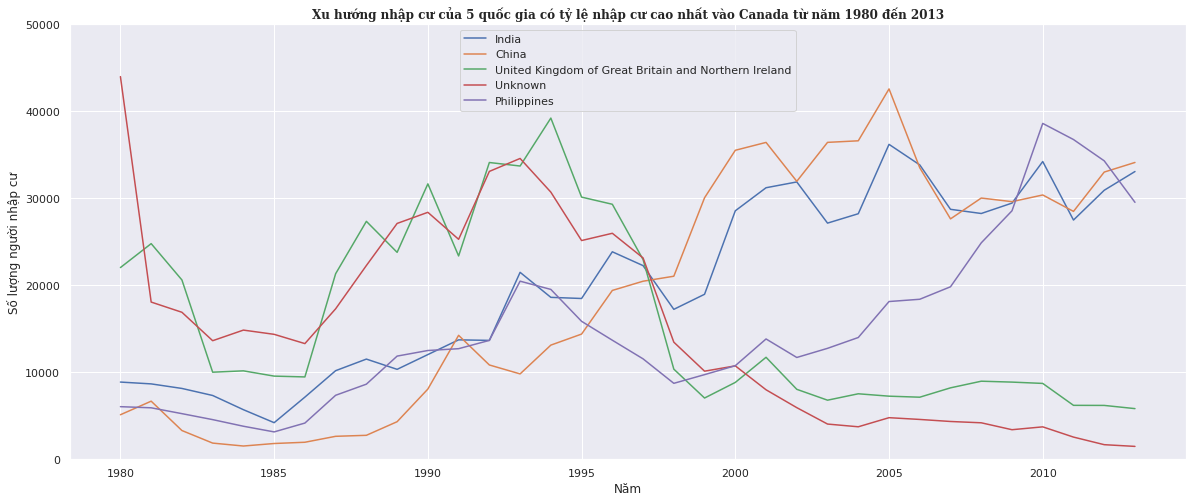

In [ ]:
list_country = list(top5_max.index)
plt.figure(figsize=(20,8))
for i in list_country:
  country = df_country(i, years)
  country.plot.line()
  plt.legend()

plt.ylim(0,50000)
plt.xlabel('Năm')
plt.ylabel('Số lượng người nhập cư')
plt.title('Xu hướng nhập cư của 5 quốc gia có tỷ lệ nhập cư cao nhất vào Canada từ năm 1980 đến 2013', fontweight='bold', fontfamily='serif')
clear_output()
plt.show()

## **Câu 8**. Tạo plot mô tả xu hướng nhập cư của năm quốc gia có tỷ lệ nhập cư thấp nhất vào Canada từ năm 1980 đến 2013.


Tỉ lệ nhập cư = Total của từng quốc gia / tổng của cột Total

$=>$ 5 quốc gia có tỉ lệ nhập cư thấp nhất vào Canada có nghĩa là 5 quốc gia có tổng số người nhập cư vào Canada thấp nhất.

In [ ]:
top5_min = df_new.sort_values(by=['Total'], ascending=True).head(5)
top5_min

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Palau,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,5
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,2,5


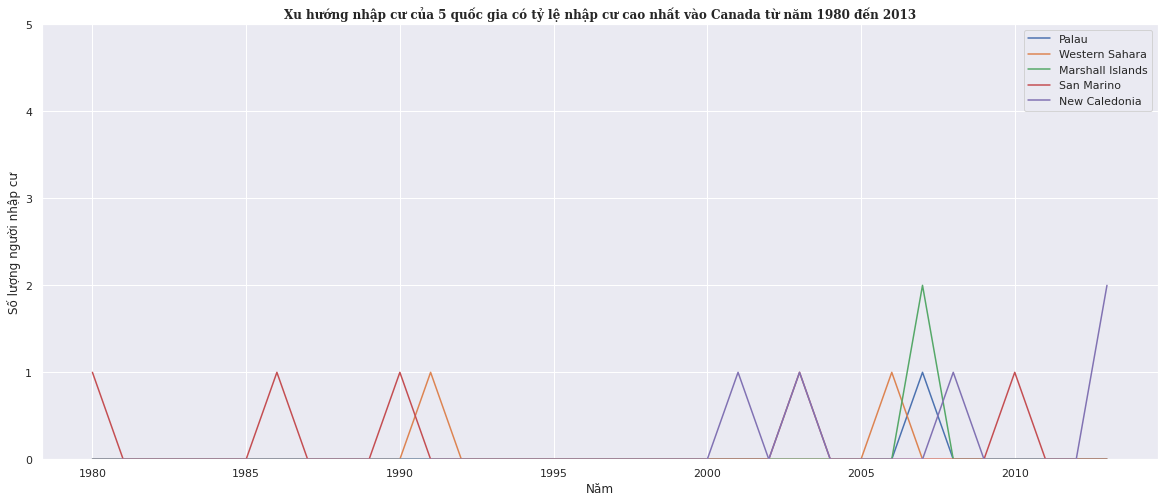

In [ ]:
list_country = list(top5_min.index)
plt.figure(figsize=(20,8))
for i in list_country:
  country = df_country(i, years)
  country.plot.line()
  plt.legend()

plt.ylim(0,5)
plt.xlabel('Năm')
plt.ylabel('Số lượng người nhập cư')
plt.title('Xu hướng nhập cư của 5 quốc gia có tỷ lệ nhập cư cao nhất vào Canada từ năm 1980 đến 2013', fontweight='bold', fontfamily='serif')
clear_output()
plt.show()

## **Câu 9**. Tạo các plot thể hiện tần suất di cư của các nước đến Canada cho từng năm 2010, 2011, 2012 và 2013. Nhận xét gì tần suất di cư đến Canada của các năm đó.

In [ ]:
sum_column = df_new.iloc[:,3:-1].sum(axis=0)
sum_column

1980    143137
1981    128641
1982    121175
1983    89185 
1984    88272 
1985    84346 
1986    99351 
1987    152075
1988    161585
1989    191550
1990    216451
1991    232802
1992    254787
1993    256638
1994    224382
1995    212864
1996    226071
1997    216036
1998    174195
1999    189950
2000    227455
2001    250636
2002    229049
2003    221349
2004    235822
2005    262242
2006    251640
2007    236753
2008    247244
2009    252170
2010    280687
2011    248748
2012    257903
2013    259021
dtype: int64

In [ ]:
target = sum_column[-4:]
target

2010    280687
2011    248748
2012    257903
2013    259021
dtype: int64

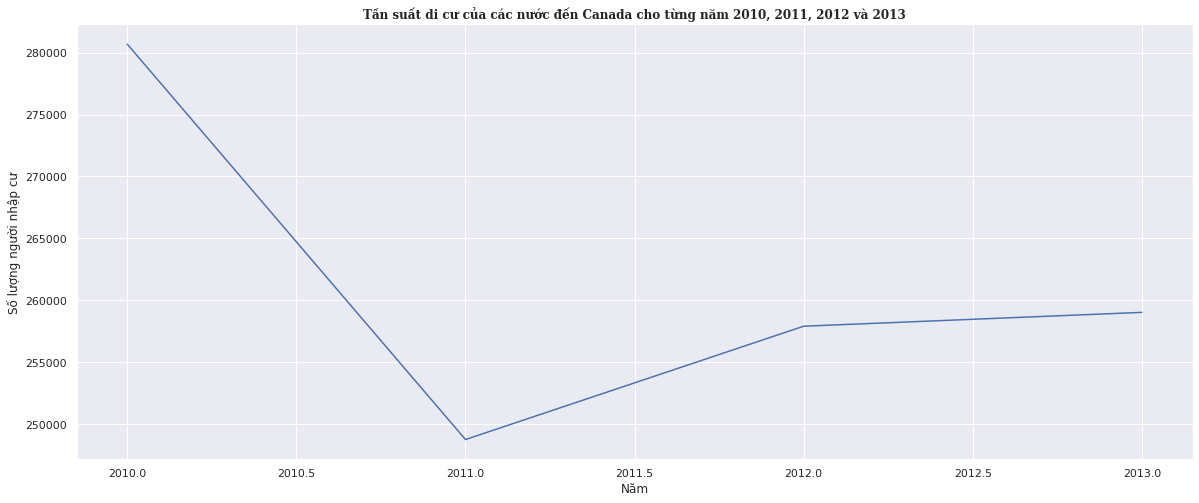

In [ ]:
plt.figure(figsize=(20,8))
target.plot.line()
plt.title('Tần suất di cư của các nước đến Canada cho từng năm 2010, 2011, 2012 và 2013', fontweight='bold', fontfamily='serif')
plt.xlabel('Năm')
plt.ylabel('Số lượng người nhập cư')
clear_output()
plt.show()

**Nhận xét**:

- Số lượng người di cư từ các nước khác vào Canada trong 4 năm $2010, 2011, 2012, 2013$ thì năm $2010$ cao nhất với $280,687$ người và năm $2011$ là thấp nhất với $248,748$ người.
- Nhìn chung số lượng người di cư từ các nước khác vào Canada trong 4 năm $2010, 2011, 2012, 2013$ là giảm.
- Trong giai đoạn $2010-2011$ số lượng người từ các nước di cư vào Canada giảm mạnh ($280,687$ người xuống còn $248,748$ người).
- Trong giai đoạn $2011-2012$ số lượng người từ các nước di cư vào Canada tăng ($248,748$ người xuống còn $257,903$ người).
- Trong giai đoạn $2012-2013$ số lượng người từ các nước di cư vào Canada tăng  nhẹ ($257,903$ người xuống còn $259,021$ người).


## **Câu 10**. Tạo các plot thể hiện tỉ lệ nhập cư của mỗi lục địa vào Canada từ năm 1980 đến 2013.

In [ ]:
df_continents = df_new.groupby('Continent', axis=0).sum()

df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


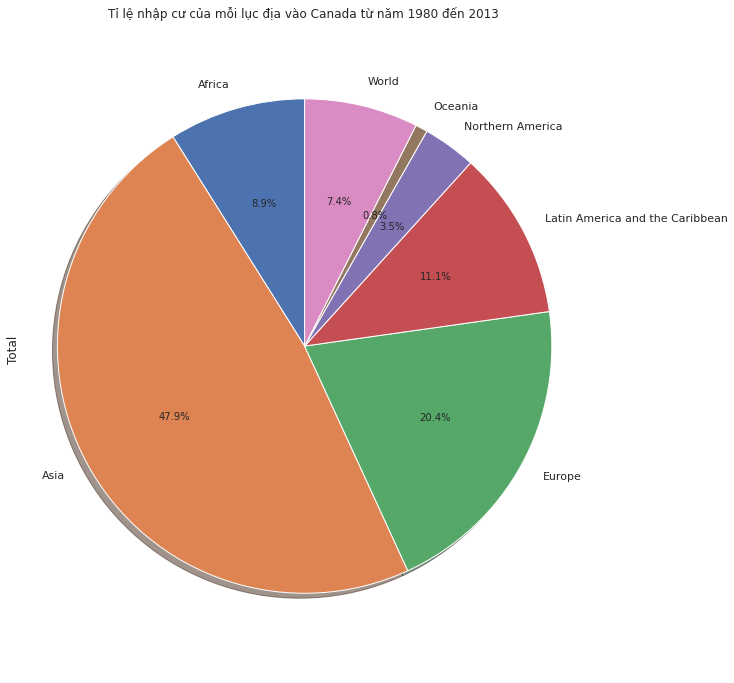

In [ ]:
df_continents['Total'].plot(kind='pie', figsize=(10, 12), autopct='%1.1f%%', 
                            startangle=90, shadow=True,)

plt.title('Tỉ lệ nhập cư của mỗi lục địa vào Canada từ năm 1980 đến 2013')
plt.axis('equal')
clear_output()
plt.show()

## **Câu 11**. *Tạo các connection map thể hiện quá trình nhập cư của các lục địa đến Canada cho các năm 2010, 2011, 2012 và 2013.

In [ ]:
import folium

In [ ]:
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json

In [ ]:
df_can = pd.read_excel(url_data, sheet_name='Canada by Citizenship (2)')
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df_can.columns = list(map(str, df_can.columns))
df_can['Total'] = df_can.sum(axis=1)
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (196, 39)


In [ ]:
world_geo = r'world_countries.json' 
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

folium.Choropleth(geo_data=world_geo, data=df_can,
                  columns=['Country', 'Total'],
                  key_on='feature.properties.name',
                  fill_color='YlOrRd', 
                  fill_opacity=0.7, 
                  line_opacity=0.2,
                  legend_name='Nhập cư vào Canada').add_to(world_map)

world_map